# Setup

In [1]:
# required for odeformer, although it's annoying to run these so i made the required changes in odeformer
%pip install torch==2.0.0
%pip install numpy==1.23.5

# changed arg weights_only = False in torch.load in sklearn_wrapper to fix a loading error from running dstr = odeformer.model.SymbolicTransformerRegressor, i.e.
# model = torch.load(model_path, weights_only=False)

# also changed np.infty to np.inf

In [2]:
# give colab permission to access drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# replace with your drive paths to MIVLE repo, odeformer repo, and shared probing_data folder
repo_path = '/content/drive/MyDrive/github/subteams/LLMProbing'
odeformer_path = '/content/drive/MyDrive/aisc'
samples_path = '/content/drive/MyDrive/github/subteams/LLMProbing/probing_data/samples/derivatives'
activations_path = '/content/drive/MyDrive/github/subteams/LLMProbing/probing_data/activations/derivatives'
probes_path = '/content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver'

In [4]:
import sys
import importlib
sys.path.append(repo_path)
sys.path.append(odeformer_path)
import numpy as np
import os
import pickle

In [5]:
import odeformer.model
dstr = odeformer.model.SymbolicTransformerRegressor(from_pretrained=True)
model_args = {'beam_size': 10, 'beam_temperature': 0.8} # higher beam temp seems to be better for avoiding nans in solutions
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=5b012c18-aee9-4ae6-aad5-f0b821f37dec
To: /content/odeformer.pt
100%|██████████| 465M/465M [00:11<00:00, 41.8MB/s]


Loaded pretrained model


# Train probes

In [15]:
import experiments

In [7]:
target_feature = 'derivative_0'
r2_threshold = -1
layers = [idx for idx in range(0, 16)]
probes_path_0 = probes_path + '/derivative_0'

In [9]:
expt_results = experiments.run_experiment.scalar_prediction_experiment_w_solver(target_feature=target_feature, activations_path=activations_path, \
                     probes_path=probes_path_0, \
                     layers=layers, r2_threshold=r2_threshold)
# save experiment results
with open(f'{probes_path_0}/experiment_data.pt', 'wb') as f:
    pickle.dump(expt_results, f)


Training on each layer:   6%|▋         | 1/16 [00:31<07:52, 31.49s/it]

Regression probe trained on layer 0: Test Set Loss 1.0322067164761393
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_0_0.pt



Training on each layer:  12%|█▎        | 2/16 [00:37<03:51, 16.53s/it]

Regression probe trained on layer 1: Test Set Loss 0.8364338769691434
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_1_0.pt



Training on each layer:  19%|█▉        | 3/16 [00:44<02:35, 11.99s/it]

Regression probe trained on layer 2: Test Set Loss 0.6738661127358986
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_2_0.pt



Training on each layer:  25%|██▌       | 4/16 [00:49<01:54,  9.56s/it]

Regression probe trained on layer 3: Test Set Loss 0.7397974991769539
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_3_0.pt



Training on each layer:  31%|███▏      | 5/16 [00:56<01:32,  8.44s/it]

Regression probe trained on layer 4: Test Set Loss 0.3313740180268117
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_4_0.pt



Training on each layer:  38%|███▊      | 6/16 [01:02<01:15,  7.56s/it]

Regression probe trained on layer 5: Test Set Loss 0.351941786008562
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_5_0.pt



Training on each layer:  44%|████▍     | 7/16 [01:08<01:05,  7.22s/it]

Regression probe trained on layer 6: Test Set Loss 0.2620644122527942
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_6_0.pt



Training on each layer:  50%|█████     | 8/16 [01:14<00:54,  6.85s/it]

Regression probe trained on layer 7: Test Set Loss 0.27626869552300565
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_7_0.pt



Training on each layer:  56%|█████▋    | 9/16 [01:21<00:46,  6.70s/it]

Regression probe trained on layer 8: Test Set Loss 0.2889984760165844
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_8_0.pt



Training on each layer:  62%|██████▎   | 10/16 [01:27<00:39,  6.58s/it]

Regression probe trained on layer 9: Test Set Loss 0.2908166153065963
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_9_0.pt



Training on each layer:  69%|██████▉   | 11/16 [01:33<00:32,  6.54s/it]

Regression probe trained on layer 10: Test Set Loss 0.305150184429048
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_10_0.pt



Training on each layer:  75%|███████▌  | 12/16 [01:40<00:25,  6.45s/it]

Regression probe trained on layer 11: Test Set Loss 0.3832865812073578
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_11_0.pt



Training on each layer:  81%|████████▏ | 13/16 [01:46<00:19,  6.47s/it]

Regression probe trained on layer 12: Test Set Loss 0.25605879397342807
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_12_0.pt



Training on each layer:  88%|████████▊ | 14/16 [01:52<00:12,  6.40s/it]

Regression probe trained on layer 13: Test Set Loss 0.2886810730285987
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_13_0.pt



Training on each layer:  94%|█████████▍| 15/16 [01:59<00:06,  6.45s/it]

Regression probe trained on layer 14: Test Set Loss 0.2896341034889929
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_14_0.pt



Training on each layer: 100%|██████████| 16/16 [02:05<00:00,  7.87s/it]

Regression probe trained on layer 15: Test Set Loss 0.3010256160866547
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_0/probe_derivative_0_15_0.pt


In [10]:
expt_results

,layer,test_loss,final_train_loss,final_val_loss,test_r2,test_spearman,test_pearson
0,0,1.032207,"(1.4375659797971088, -1.0278848139712338, 0.04...","(1.0670177719165015, -1.1827128184108768, 0.06...",-0.640491,0.730751,0.562220
1,1,0.836434,"(1.5935983220540995, -1.247989911070603, -0.17...","(0.9952953234381615, -1.0359959903634461, -0.1...",-0.329348,0.756154,0.525323
2,2,0.673866,"(3.10530713754742, -3.380463397874201, 0.00129...","(3.6838913879668858, -6.535841689723279, -0.11...",-0.070979,0.682661,0.566673
3,3,0.739797,"(9.399142940013439, -12.258785664553146, -0.02...","(8.330380802353224, -16.040793072488505, -0.02...",-0.175764,0.674030,0.560505
4,4,0.331374,"(13.464612955184707, -17.99369106478272, -0.22...","(9.86758104529387, -19.185320833579166, -0.215...",0.473346,0.747218,0.754347
5,5,0.351942,"(21.391872355059313, -29.17618229479151, 0.005...","(10.285728354472667, -20.040690978158377, 0.15...",0.440657,0.861888,0.761265
6,6,0.262064,"(1.6587711676634702, -1.3399251809590371, -0.4...","(1.0185096692972972, -1.0834836732750688, -0.5...",0.583500,0.839417,0.786854
7,7,0.276269,"(0.7912396435448216, -0.1161524924208377, -0.2...","(0.5151483934807572, -0.053797852604315466, -0...",0.560925,0.801531,0.778703
8,8,0.288998,"(0.942282427831588, -0.3292191374688318, -0.05...","(0.6033465629176741, -0.23421779247295293, -0....",0.540693,0.890765,0.780632
9,9,0.290817,"(4.248056997179791, -4.992469533048361, 0.3809...","(4.16002041225632, -7.509820699964928, 0.32674...",0.537804,0.903249,0.777089


In [16]:
target_feature = 'derivative_3'
r2_threshold = -1
layers = [idx for idx in range(0, 16)]
probes_path_3 = probes_path + '/derivative_3'

In [18]:
expt_results = experiments.run_experiment.scalar_prediction_experiment_w_solver(target_feature=target_feature, activations_path=activations_path, \
                     probes_path=probes_path_3, \
                     layers=layers, r2_threshold=r2_threshold)
# save experiment results
with open(f'{probes_path_3}/experiment_data.pt', 'wb') as f:
    pickle.dump(expt_results, f)


Training on each layer:   6%|▋         | 1/16 [00:07<01:57,  7.82s/it]

Regression probe trained on layer 0: Test Set Loss 0.2608614463623174
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_0_0.pt



Training on each layer:  12%|█▎        | 2/16 [00:14<01:39,  7.14s/it]

Regression probe trained on layer 1: Test Set Loss 0.22239654565553582
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_1_0.pt



Training on each layer:  19%|█▉        | 3/16 [00:21<01:30,  7.00s/it]

Regression probe trained on layer 2: Test Set Loss 0.18670090925873714
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_2_0.pt



Training on each layer:  25%|██▌       | 4/16 [00:27<01:22,  6.87s/it]

Regression probe trained on layer 3: Test Set Loss 0.21300157828136435
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_3_0.pt



Training on each layer:  31%|███▏      | 5/16 [00:34<01:14,  6.78s/it]

Regression probe trained on layer 4: Test Set Loss 0.08780385549818466
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_4_0.pt



Training on each layer:  38%|███▊      | 6/16 [00:40<01:05,  6.60s/it]

Regression probe trained on layer 5: Test Set Loss 0.09941695910326113
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_5_0.pt



Training on each layer:  44%|████▍     | 7/16 [00:47<00:59,  6.59s/it]

Regression probe trained on layer 6: Test Set Loss 0.3251320677840492
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_6_0.pt



Training on each layer:  50%|█████     | 8/16 [00:54<00:52,  6.59s/it]

Regression probe trained on layer 7: Test Set Loss 0.08821941718671884
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_7_0.pt



Training on each layer:  56%|█████▋    | 9/16 [01:00<00:46,  6.61s/it]

Regression probe trained on layer 8: Test Set Loss 0.08239726092545552
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_8_0.pt



Training on each layer:  62%|██████▎   | 10/16 [01:07<00:39,  6.56s/it]

Regression probe trained on layer 9: Test Set Loss 0.08185628723475238
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_9_0.pt



Training on each layer:  69%|██████▉   | 11/16 [01:13<00:32,  6.59s/it]

Regression probe trained on layer 10: Test Set Loss 0.07918926989096538
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_10_0.pt



Training on each layer:  75%|███████▌  | 12/16 [01:20<00:26,  6.65s/it]

Regression probe trained on layer 11: Test Set Loss 0.08451351043034568
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_11_0.pt



Training on each layer:  81%|████████▏ | 13/16 [01:27<00:19,  6.62s/it]

Regression probe trained on layer 12: Test Set Loss 0.08069542215359131
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_12_0.pt



Training on each layer:  88%|████████▊ | 14/16 [01:33<00:13,  6.69s/it]

Regression probe trained on layer 13: Test Set Loss 0.0817743860457942
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_13_0.pt



Training on each layer:  94%|█████████▍| 15/16 [01:40<00:06,  6.65s/it]

Regression probe trained on layer 14: Test Set Loss 0.08181704134816907
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_14_0.pt



Training on each layer: 100%|██████████| 16/16 [01:47<00:00,  6.71s/it]

Regression probe trained on layer 15: Test Set Loss 0.0905737019285251
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/derivatives_w_solver/derivative_3/probe_derivative_3_15_0.pt


In [19]:
expt_results

,layer,test_loss,final_train_loss,final_val_loss,test_r2,test_spearman,test_pearson
0,0,0.260861,"(0.502216100307536, -1.2030697318482027, 0.068...","(0.3563806132311811, -1.536634381527834, -0.02...",-0.694471,0.737591,0.573568
1,1,0.222397,"(0.3448219253931705, -0.5126291941855987, -0.0...","(0.26780650145004375, -0.9061843589102716, -0....",-0.444616,0.738188,0.496708
2,2,0.186701,"(2.3769635156082844, -9.427017953494914, -0.13...","(1.9858015902633877, -13.134473199637123, 0.27...",-0.212749,0.669688,0.533993
3,3,0.213002,"(0.4072468270176378, -0.7864683215875485, 0.02...","(0.4186085373997533, -1.9795581004427887, 0.02...",-0.383589,0.649442,0.526425
4,4,0.087804,"(22.86711558053246, -99.3111002140818, 0.37572...","(15.769372627139091, -111.24272623251757, 0.39...",0.429655,0.688089,0.762945
5,5,0.099417,"(16.643988812743842, -72.0121308246904, 0.0727...","(14.69158228735129, -103.57126190722083, 0.337...",0.354220,0.826173,0.755191
6,6,0.325132,"(1.7574524497329562, -6.70941075595159, -0.039...","(0.8557949469189529, -5.091349222715496, 0.175...",-1.111953,0.629576,0.625558
7,7,0.088219,"(0.31473974369907776, -0.38066778606881946, 0....","(0.18549932452394083, -0.32034105723816864, 0....",0.426955,0.583657,0.776522
8,8,0.082397,"(1.3169860289420012, -4.777218244235915, 0.329...","(1.2085885861888528, -7.602452458664041, 0.302...",0.464774,0.886338,0.776801
9,9,0.081856,"(0.27384779410964155, -0.20128721560509355, 0....","(0.16887416063688931, -0.2020069796460393, 0.1...",0.468288,0.804896,0.778809


# Plot results

In [20]:
import experiments.utils as expt_utils

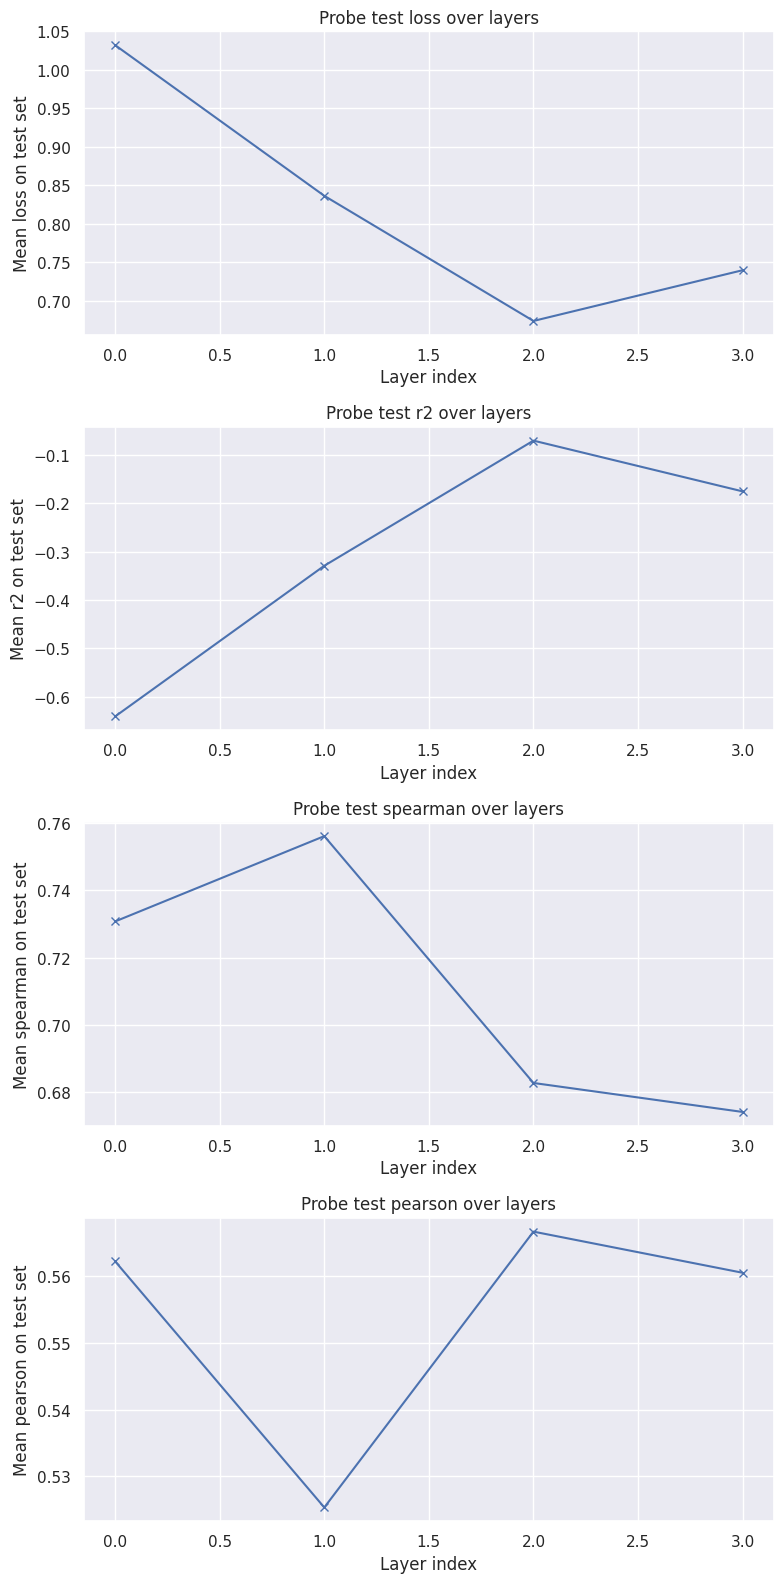

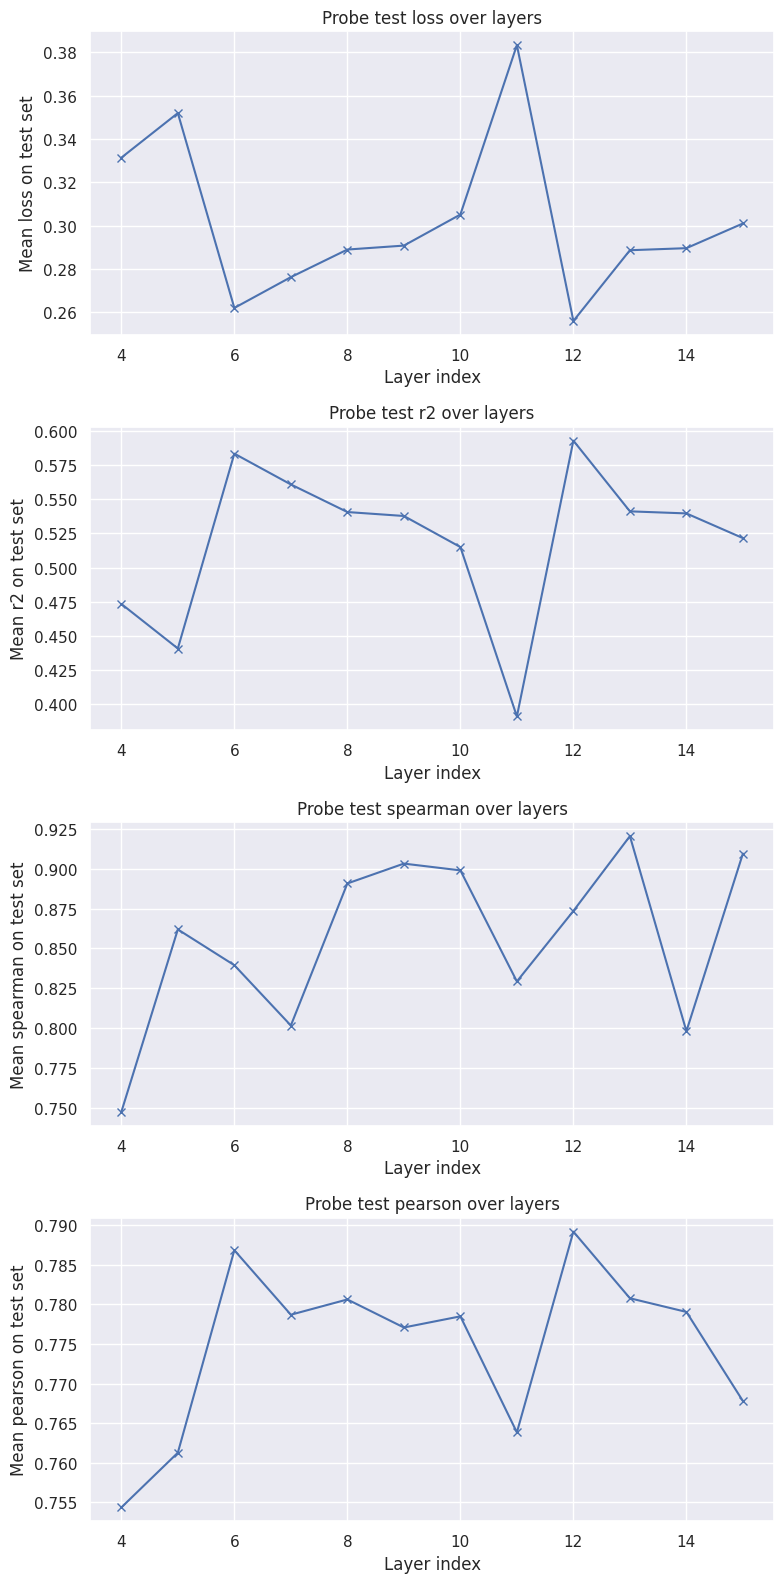

In [21]:
# load expt results
with open(f'{probes_path_0}/experiment_data.pt', 'rb') as f:
    expt_results = pickle.load(f)
expt_summary = expt_utils.summarise_experiment(expt_results, incl_extras = True)

# plot encoder layers
expt_utils.plot_from_summary(expt_summary, incl_extras = True, descriptor='derivative_0', layers = [0,1,2,3])

# plot decover layers
expt_utils.plot_from_summary(expt_summary, incl_extras = True, descriptor='derivative_0', layers = range(4,16))

In [22]:
expt_summary

,layer,r2_mean,r2_std,spearman_mean,spearman_std,pearson_mean,pearson_std,loss_mean,loss_std
0,0,-0.640491,NaN,0.730751,NaN,0.562220,NaN,1.032207,NaN
1,1,-0.329348,NaN,0.756154,NaN,0.525323,NaN,0.836434,NaN
2,2,-0.070979,NaN,0.682661,NaN,0.566673,NaN,0.673866,NaN
3,3,-0.175764,NaN,0.674030,NaN,0.560505,NaN,0.739797,NaN
4,4,0.473346,NaN,0.747218,NaN,0.754347,NaN,0.331374,NaN
5,5,0.440657,NaN,0.861888,NaN,0.761265,NaN,0.351942,NaN
6,6,0.583500,NaN,0.839417,NaN,0.786854,NaN,0.262064,NaN
7,7,0.560925,NaN,0.801531,NaN,0.778703,NaN,0.276269,NaN
8,8,0.540693,NaN,0.890765,NaN,0.780632,NaN,0.288998,NaN
9,9,0.537804,NaN,0.903249,NaN,0.777089,NaN,0.290817,NaN


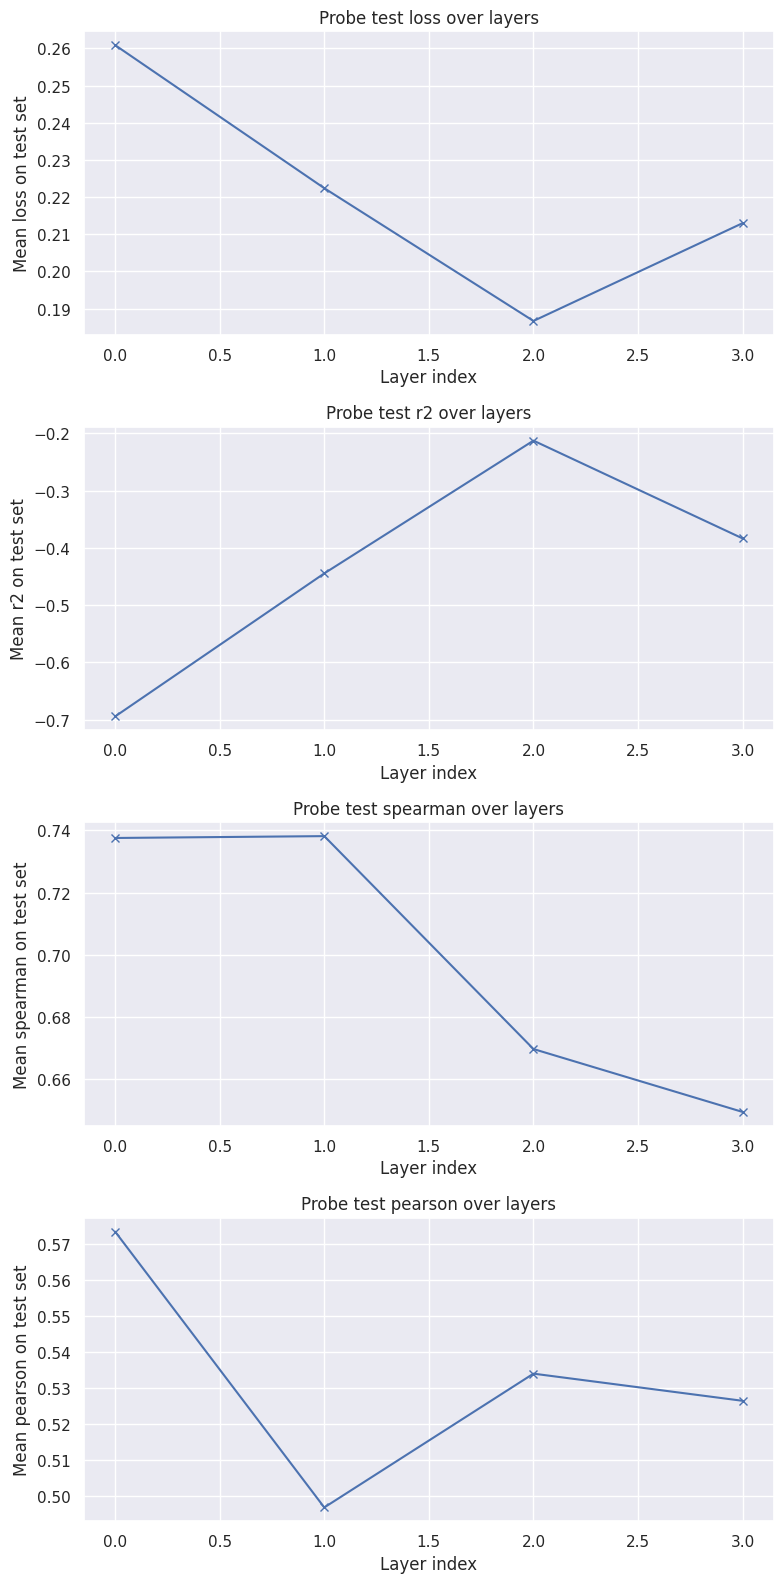

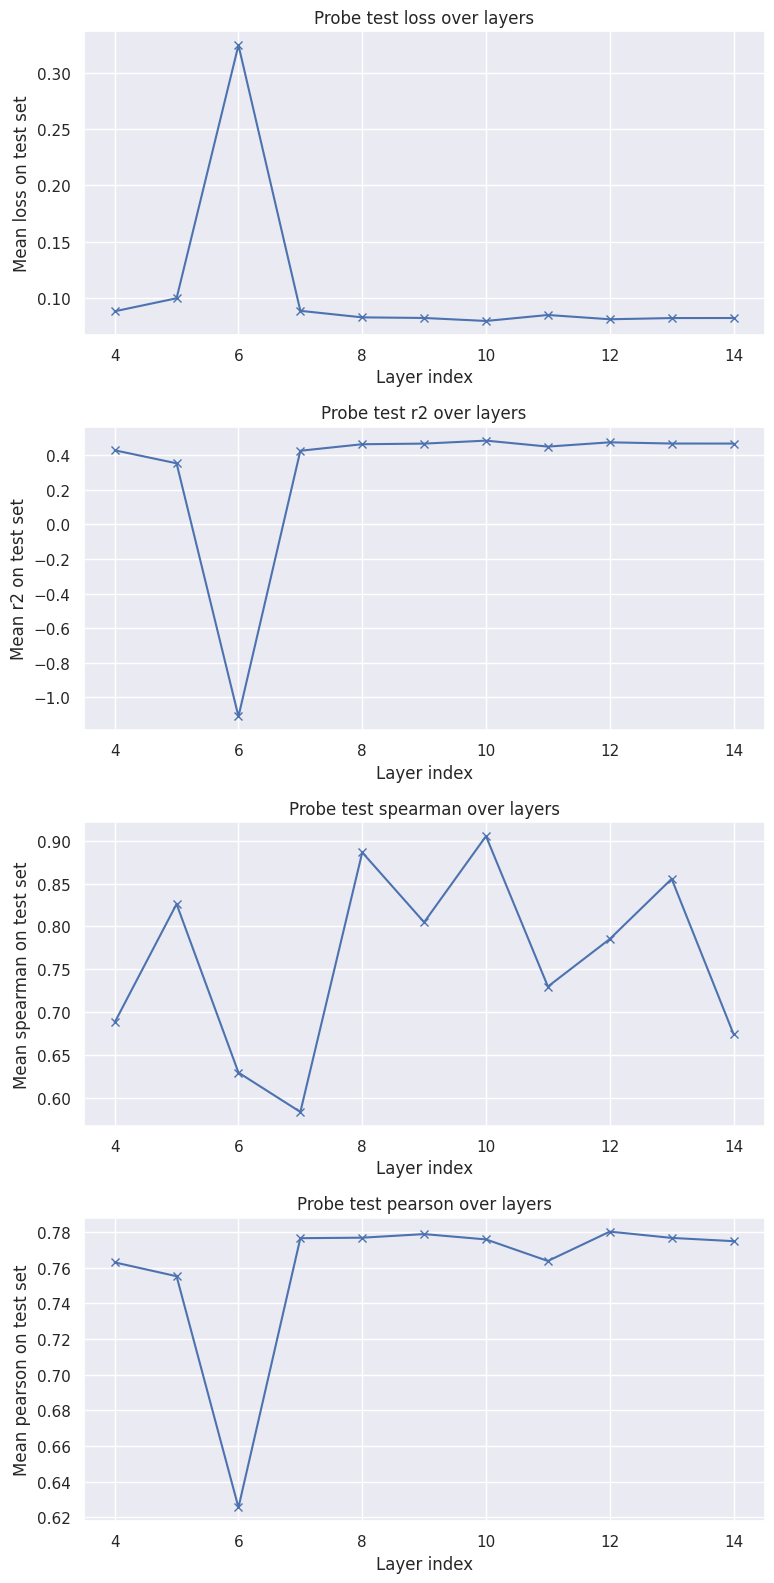

In [23]:
# load experiment results
with open(f'{probes_path_3}/experiment_data.pt', 'rb') as f:
    expt_results = pickle.load(f)
expt_summary = expt_utils.summarise_experiment(expt_results, incl_extras = True)
expt_utils.plot_from_summary(expt_summary, incl_extras = True, descriptor='derivative_3', layers=[0,1,2,3])

expt_utils.plot_from_summary(expt_summary, incl_extras = True, descriptor='derivative_3', layers=range(4,15))

In [24]:
expt_summary

,layer,r2_mean,r2_std,spearman_mean,spearman_std,pearson_mean,pearson_std,loss_mean,loss_std
0,0,-0.694471,NaN,0.737591,NaN,0.573568,NaN,0.260861,NaN
1,1,-0.444616,NaN,0.738188,NaN,0.496708,NaN,0.222397,NaN
2,2,-0.212749,NaN,0.669688,NaN,0.533993,NaN,0.186701,NaN
3,3,-0.383589,NaN,0.649442,NaN,0.526425,NaN,0.213002,NaN
4,4,0.429655,NaN,0.688089,NaN,0.762945,NaN,0.087804,NaN
5,5,0.354220,NaN,0.826173,NaN,0.755191,NaN,0.099417,NaN
6,6,-1.111953,NaN,0.629576,NaN,0.625558,NaN,0.325132,NaN
7,7,0.426955,NaN,0.583657,NaN,0.776522,NaN,0.088219,NaN
8,8,0.464774,NaN,0.886338,NaN,0.776801,NaN,0.082397,NaN
9,9,0.468288,NaN,0.804896,NaN,0.778809,NaN,0.081856,NaN


In [25]:
expt_summary[expt_summary['layer']<4]

,layer,r2_mean,r2_std,spearman_mean,spearman_std,pearson_mean,pearson_std,loss_mean,loss_std
0,0,-0.694471,NaN,0.737591,NaN,0.573568,NaN,0.260861,NaN
1,1,-0.444616,NaN,0.738188,NaN,0.496708,NaN,0.222397,NaN
2,2,-0.212749,NaN,0.669688,NaN,0.533993,NaN,0.186701,NaN
3,3,-0.383589,NaN,0.649442,NaN,0.526425,NaN,0.213002,NaN


Repeat 0 of layer 0


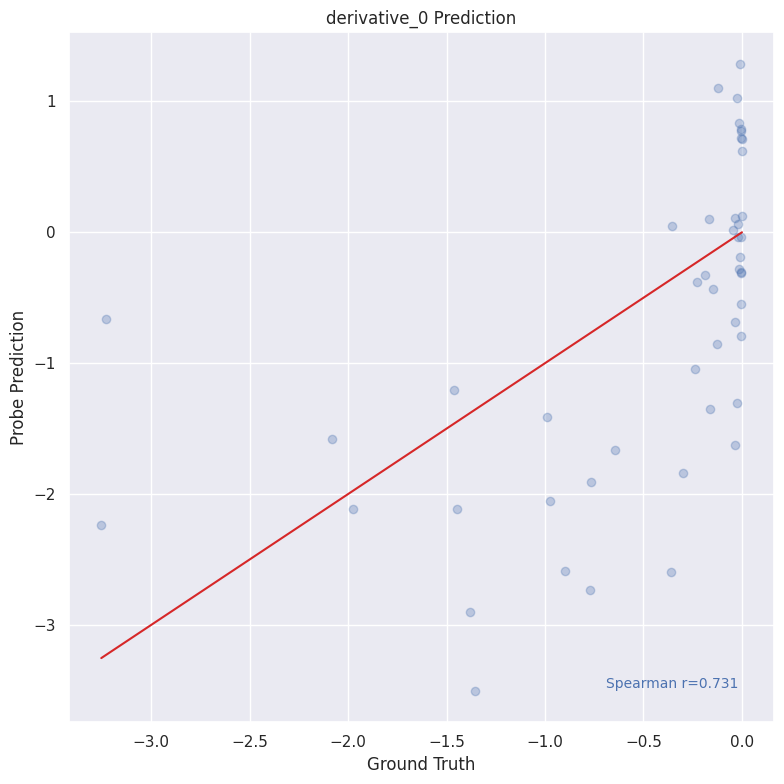

Repeat 0 of layer 1


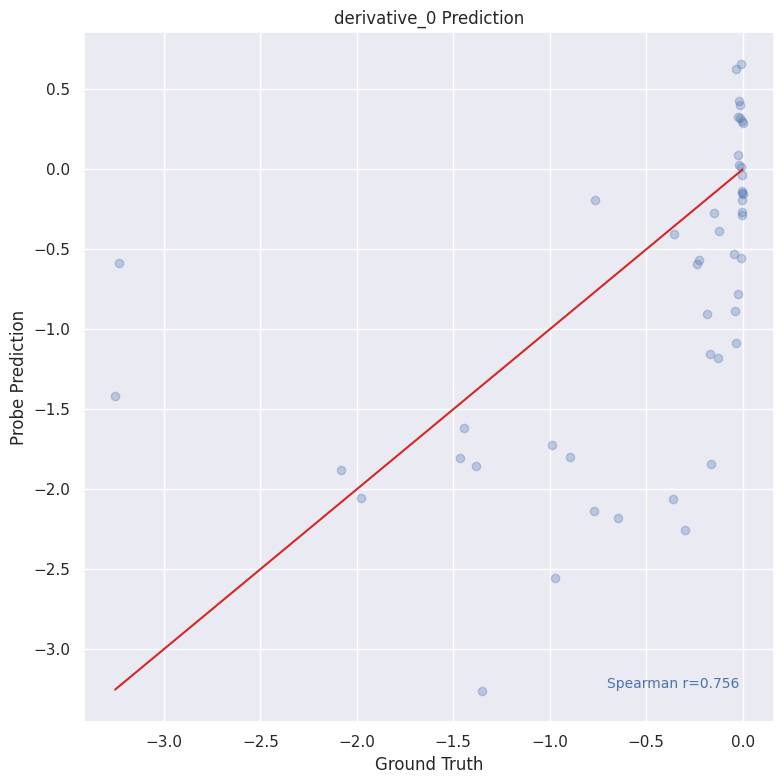

Repeat 0 of layer 2


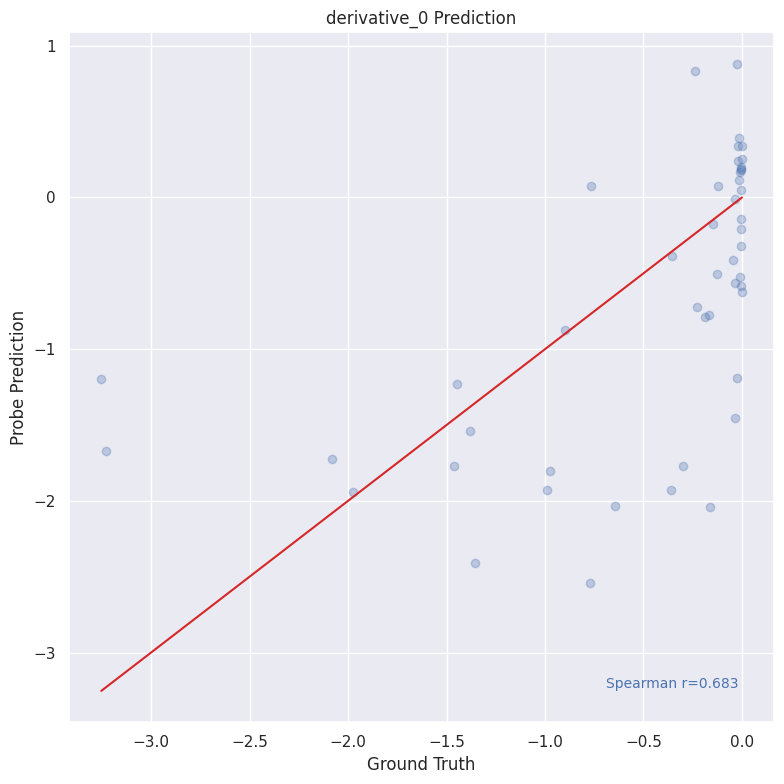

Repeat 0 of layer 3


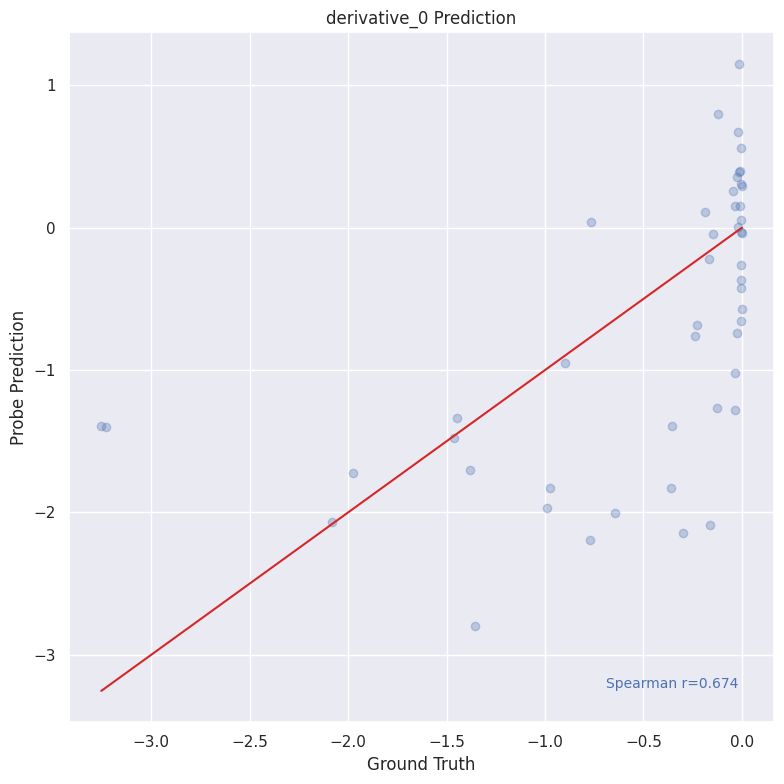

Repeat 0 of layer 4


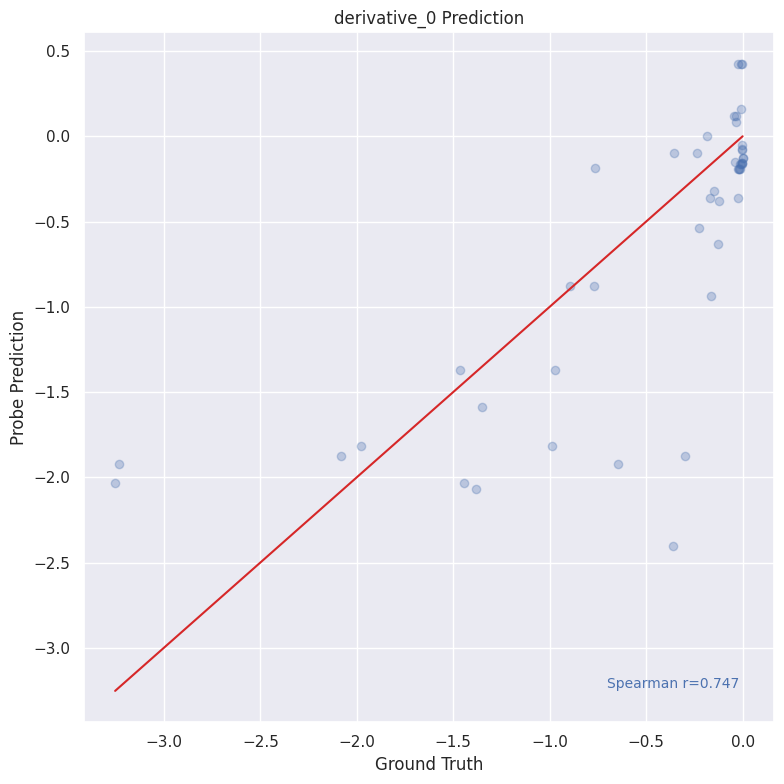

Repeat 0 of layer 5


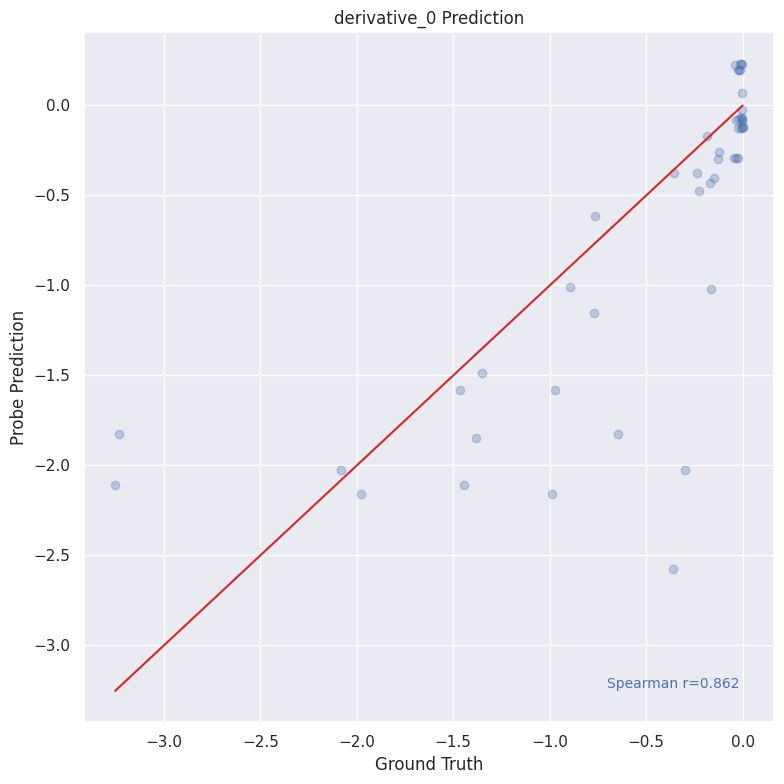

Repeat 0 of layer 6


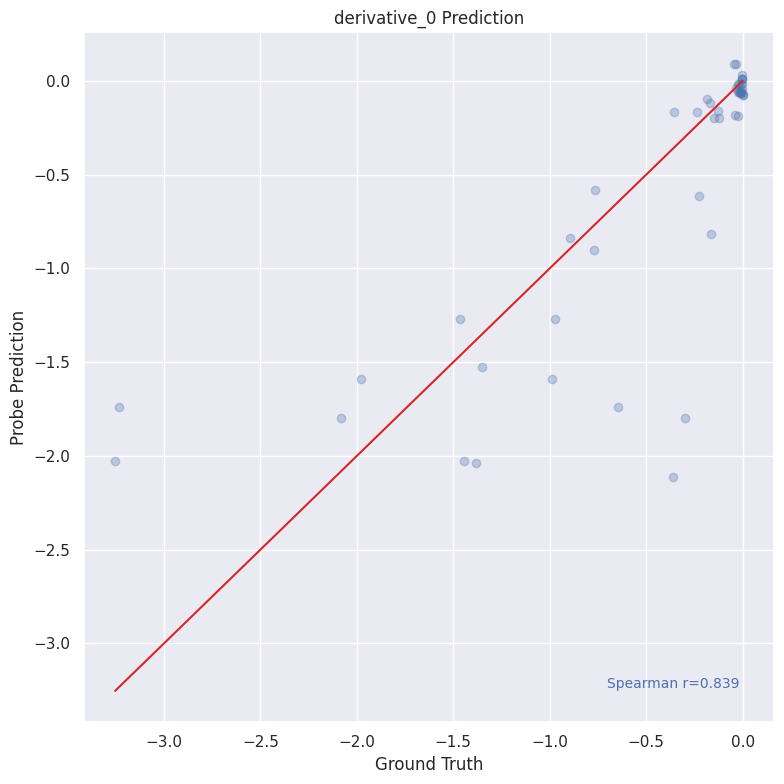

Repeat 0 of layer 7


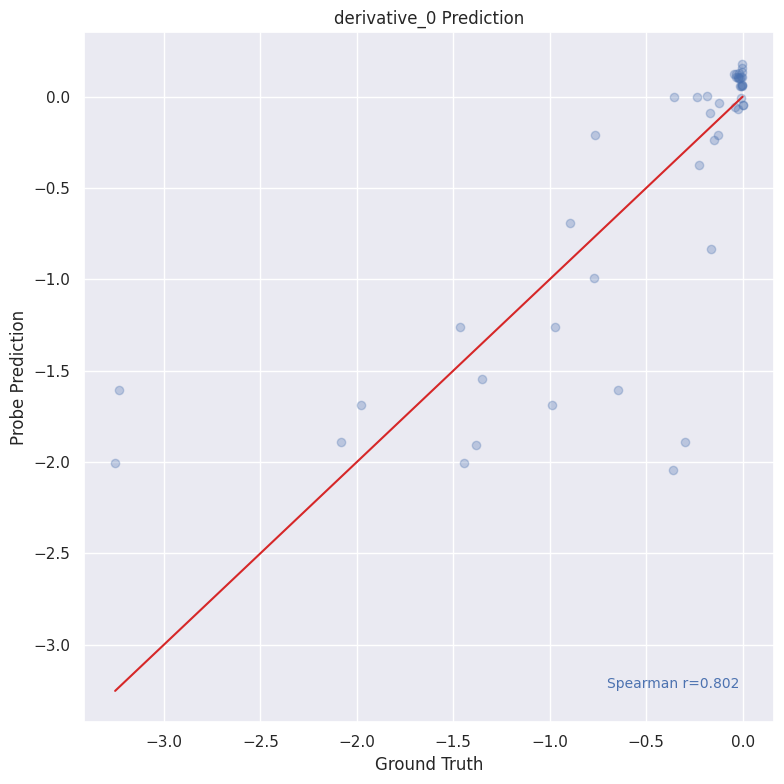

Repeat 0 of layer 8


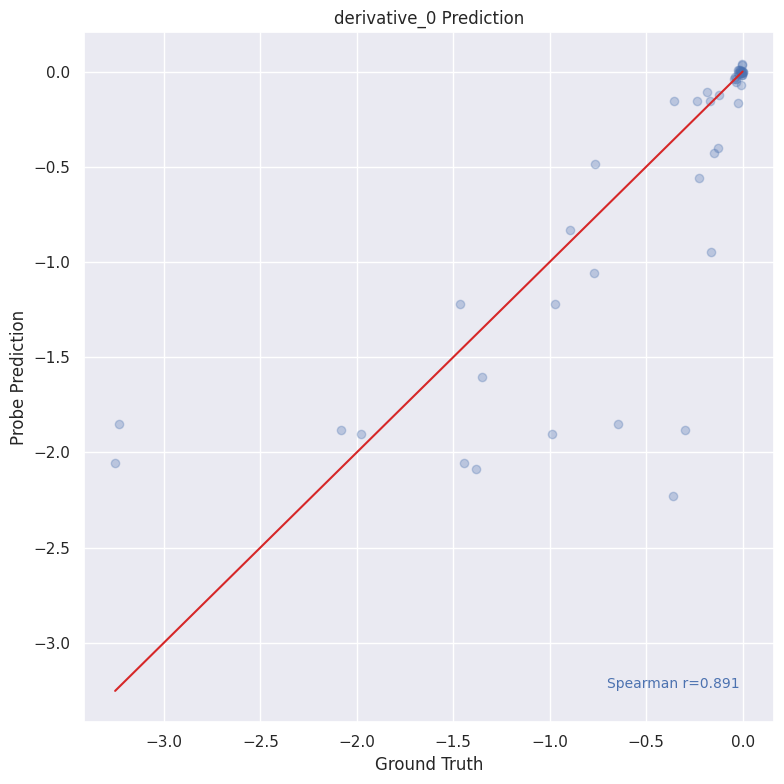

Repeat 0 of layer 9


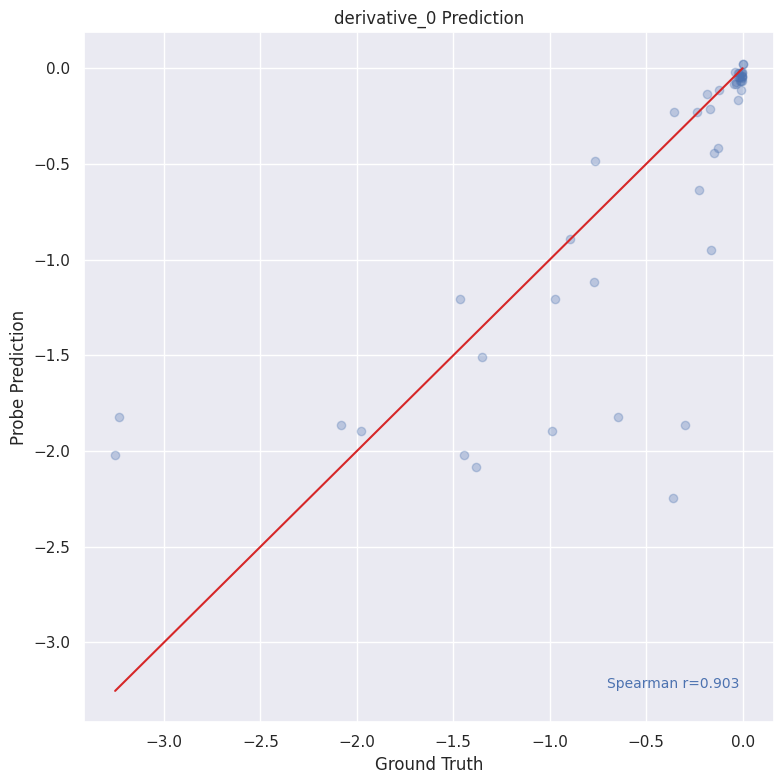

Repeat 0 of layer 10


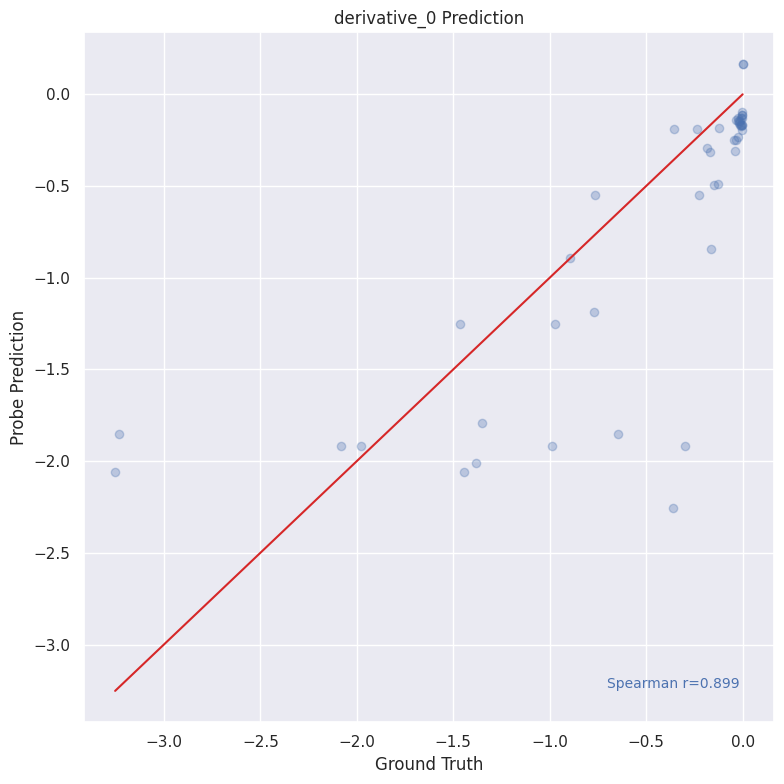

Repeat 0 of layer 11


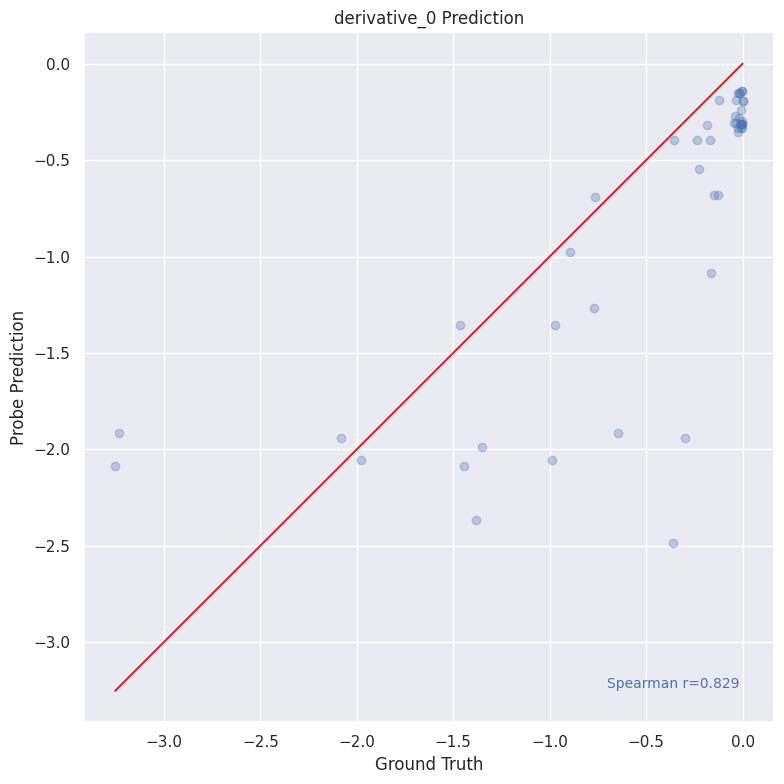

Repeat 0 of layer 12


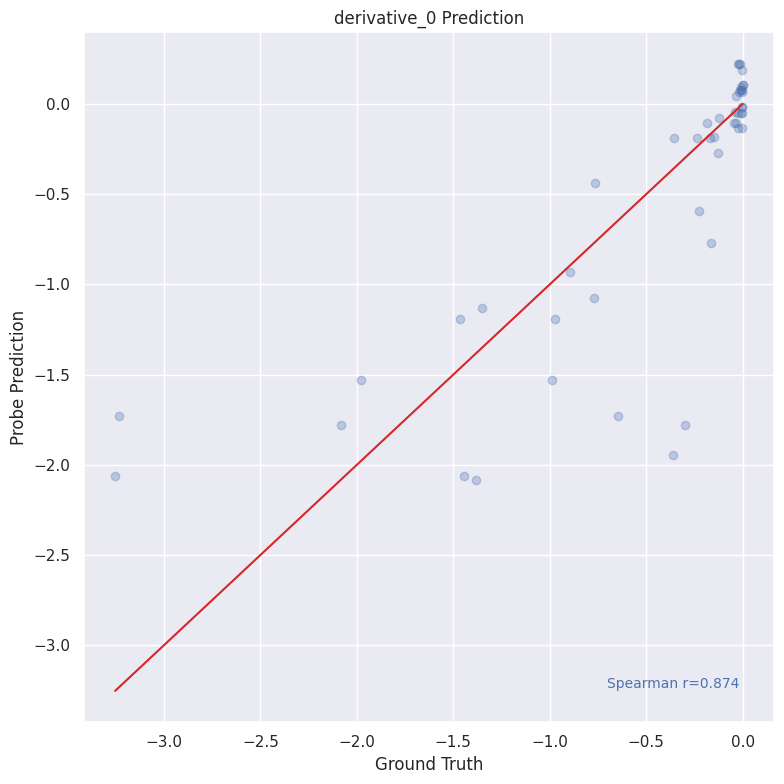

Repeat 0 of layer 13


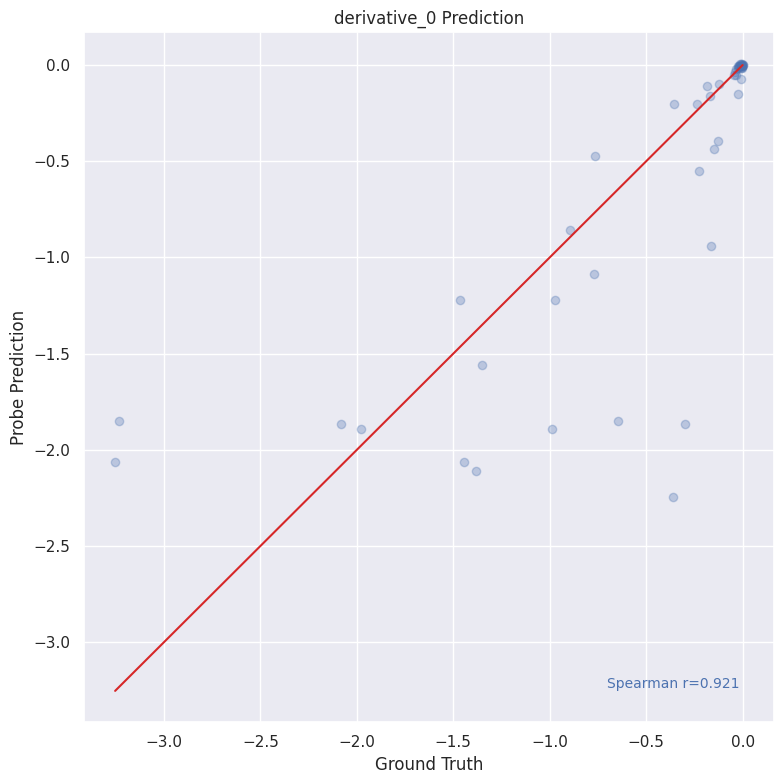

Repeat 0 of layer 14


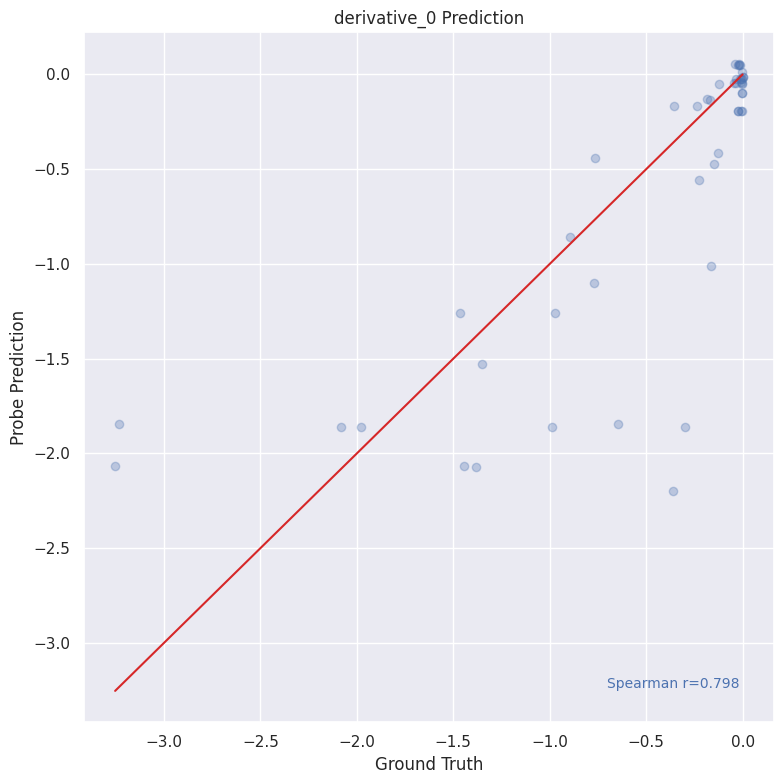

In [27]:
layers = range(0,15)

target_feature = 'derivative_0'
feature_descriptor = 'derivative_0'
descriptor = ' '
r2_threshold = -1
num_repeats = 1
shuffle_datasets=True
use_val=True
data_split=[0.8, 0.1, 0.1]

expt_utils.plot_all_scalar_predictions(target_feature, feature_descriptor, descriptor, activations_path, probes_path_0, layers, num_repeats, r2_threshold)